In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from math import erf, sqrt

# Kickstarter 
## Understanding the successes and failures

In this project I wanted to find out more about how the distribution of funding in Kickstater looked like. The Data is downloaded from Kaggle and refer to the year 2018.

1. What is the distribution of the ratio of the goal pledged to the projects.
2. How does the probability of a succesfully crowdfunding your project differ between categories?
3. In what category and at what funding goal are the probabilities of success the highest?

In [3]:
kick=pd.read_csv('ks-projects-201801.csv')
df=kick.copy()

In [4]:
df.head(20)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


## What is the distribution of the ratio of the goal to the amount pledged.

In [5]:
df['ratio']=df['pledged']/df['goal']

<AxesSubplot:xlabel='ratio'>

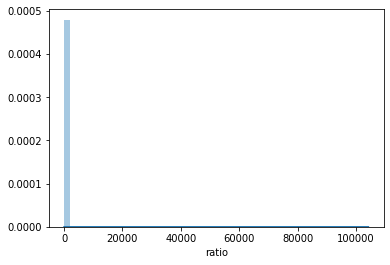

In [6]:
sns.distplot(df['ratio'])

In [7]:
mu=df['ratio'].mean()
print(mu)
me=df['ratio'].median()
print(me)
sd=df['ratio'].std()
print(sd)

3.235920942669484
0.13464
266.8985927940698


It is clear from these numbers that there are some outliers that make it hard to read the data. 

In [8]:
df.loc[(df['ratio'] > 2)] = 2

<AxesSubplot:xlabel='ratio'>

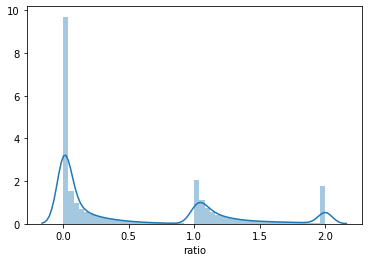

In [9]:
sns.distplot(df['ratio'])

Now we can see that the changes above doesnt change our data that much. There are two peaks (and one artificial one). One around 0 and one around 1.

Lets take a close look at the peak at 1 and see if we can get some insight.

In [11]:
df_win=df.loc[(df['ratio'] >= 1) & (df['ratio']< 2)]


<AxesSubplot:xlabel='ratio'>

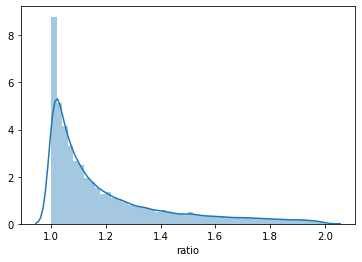

In [12]:
sns.distplot(df_win['ratio'])

So, this is not the complete picture, but due to the way this data is distributed, looking at only this part can inform us about the likelihood of pledging money beyond the set goal. So lets find out a bit about the distribution given that you have been successful in funding your project.

In [15]:
mu = df_win['ratio'].mean()
sigma = df_win['ratio'].std()  
x1 = mu-sigma  
x2 = mu+sigma

In [16]:
double_prob = erf( (x1-mu) / (sigma*sqrt(2)) )
p_lower = double_prob/2
print(f'\n Lower Bound: {round(p_lower,4)}')

double_prob = erf( (x2-mu) / (sigma*sqrt(2)) )
p_upper = double_prob/2
print(f'\n Upper Bound: {round(p_upper,4)}')


 Lower Bound: -0.3413

 Upper Bound: 0.3413


In [17]:
Pin = (p_upper) - (p_lower)

print('\n')
print(f'mean = {mu}    std dev = {sigma} \n')
print(f'Calculating the probability of occurring between {x1} <--> {x2} \n')
print(f'inside interval Pin = {round(Pin*100,1)}%')
print(f'outside interval Pout = {round((1-Pin)*100,1)}% \n')
print('\n')



mean = 1.196739437205356    std dev = 0.22569053110075335 

Calculating the probability of occurring between 0.9710489061046026 <--> 1.4224299683061092 

inside interval Pin = 68.3%
outside interval Pout = 31.7% 





So, here we can see that the average ratio of funding for successful projects is around 1.197 with a standard deviation of around 0.226.  68.4% of the successful projects fall into one std from the mean. 31.7% are even luckier and get even better. 


Regarding the data on the extreme that I have so far ignored. 

In [22]:
df2=kick.copy()

In [23]:
df2['ratio']=df2['pledged']/df2['goal']

In [24]:
df_xlwin=df2.loc[(df2['ratio'] >= 2) & (df2['ratio']< 10)]


<AxesSubplot:xlabel='ratio'>

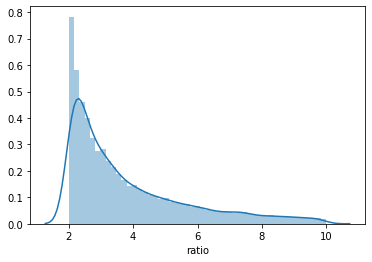

In [25]:
sns.distplot(df_xlwin['ratio'])

In [26]:
mu = df_xlwin['ratio'].mean()
sigma = df_xlwin['ratio'].std()  
x1 = 2   
x2 = mu+2*sigma

In [27]:
double_prob = erf( (x1-mu) / (sigma*sqrt(2)) )
p_lower = double_prob/2
print(f'\n Lower Bound: {round(p_lower,4)}')

double_prob = erf( (x2-mu) / (sigma*sqrt(2)) )
p_upper = double_prob/2
print(f'\n Upper Bound: {round(p_upper,4)}')


 Lower Bound: -0.3334

 Upper Bound: 0.4772


In [28]:
Pin = (p_upper) - (p_lower)

print('\n')
print(f'mean = {mu}    std dev = {sigma} \n')
print(f'Calculating the probability of occurring between {x1} <--> {x2} \n')
print(f'inside interval Pin = {round(Pin*100,1)}%')
print(f'outside interval Pout = {round((1-Pin)*100,1)}% \n')
print('\n')



mean = 3.810955569897237    std dev = 1.8713589668363342 

Calculating the probability of occurring between 2 <--> 7.553673503569906 

inside interval Pin = 81.1%
outside interval Pout = 18.9% 





## Task 2: What is the probability of success in each category?

Here, I will see if the probability of success differ between categories. 

In [70]:
df3=kick.copy()

In [71]:
df3.drop(columns=['category'],inplace=True)


In [72]:
df3=df3.rename(columns={"main_category": "category"})


In [73]:
df_category=df3.groupby('category'
).ID.count().reset_index()
df_category=df_category.rename(columns={'ID':'total'})
df_category

,category,total
0,Art,28153
1,Comics,10819
2,Crafts,8809
3,Dance,3768
4,Design,30070
5,Fashion,22816
6,Film & Video,63585
7,Food,24602
8,Games,35231
9,Journalism,4755


In [74]:
win_cat=df3[df3['state'].isin(['successful'])
][['category','ID']
].groupby('category'
).count().rename(columns={'ID':'success'}).reset_index()
win_cat

,category,success
0,Art,11510
1,Comics,5842
2,Crafts,2115
3,Dance,2338
4,Design,10550
5,Fashion,5593
6,Film & Video,23623
7,Food,6085
8,Games,12518
9,Journalism,1012


In [75]:
fail_cat=df3[~df3['state'].isin(['successful'])
][['category','ID']
].groupby('category'
).count().rename(columns={'ID':'fail'}).reset_index()
fail_cat

,category,fail
0,Art,16643
1,Comics,4977
2,Crafts,6694
3,Dance,1430
4,Design,19520
5,Fashion,17223
6,Film & Video,39962
7,Food,18517
8,Games,22713
9,Journalism,3743


In [76]:
df_category=pd.merge(df_category, win_cat, how='inner', on='category',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [77]:
df_category=pd.merge(df_category, fail_cat, how='inner', on='category',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [78]:
df_category

,category,total,success,fail
0,Art,28153,11510,16643
1,Comics,10819,5842,4977
2,Crafts,8809,2115,6694
3,Dance,3768,2338,1430
4,Design,30070,10550,19520
5,Fashion,22816,5593,17223
6,Film & Video,63585,23623,39962
7,Food,24602,6085,18517
8,Games,35231,12518,22713
9,Journalism,4755,1012,3743


In [79]:
total=df_category['total'].sum()
total

378661

In [80]:
total_prob_success=df_category['success'].sum()/total
total_prob_success

0.3537623362321443

In [84]:
df_category['ps_in_category']=df_category['success']/df_category['total']
df_category

,category,total,success,fail,ps_in_category
0,Art,28153,11510,16643,0.408837
1,Comics,10819,5842,4977,0.539976
2,Crafts,8809,2115,6694,0.240095
3,Dance,3768,2338,1430,0.620488
4,Design,30070,10550,19520,0.350848
5,Fashion,22816,5593,17223,0.245135
6,Film & Video,63585,23623,39962,0.371518
7,Food,24602,6085,18517,0.247338
8,Games,35231,12518,22713,0.355312
9,Journalism,4755,1012,3743,0.212829


In [85]:
df_category['pf_in_category']=df_category['fail']/df_category['total']
df_category

,category,total,success,fail,ps_in_category,pf_in_category
0,Art,28153,11510,16643,0.408837,0.591163
1,Comics,10819,5842,4977,0.539976,0.460024
2,Crafts,8809,2115,6694,0.240095,0.759905
3,Dance,3768,2338,1430,0.620488,0.379512
4,Design,30070,10550,19520,0.350848,0.649152
5,Fashion,22816,5593,17223,0.245135,0.754865
6,Film & Video,63585,23623,39962,0.371518,0.628482
7,Food,24602,6085,18517,0.247338,0.752662
8,Games,35231,12518,22713,0.355312,0.644688
9,Journalism,4755,1012,3743,0.212829,0.787171


In [86]:
df_category['prob_of_cat']=df_category.total/total

In [87]:
df_category['cat_in_success']=(df_category['ps_in_category']*df_category['prob_of_cat'])/total_prob_success

In [171]:
df_category=df_category.sort_values('ps_in_category', ascending=False)

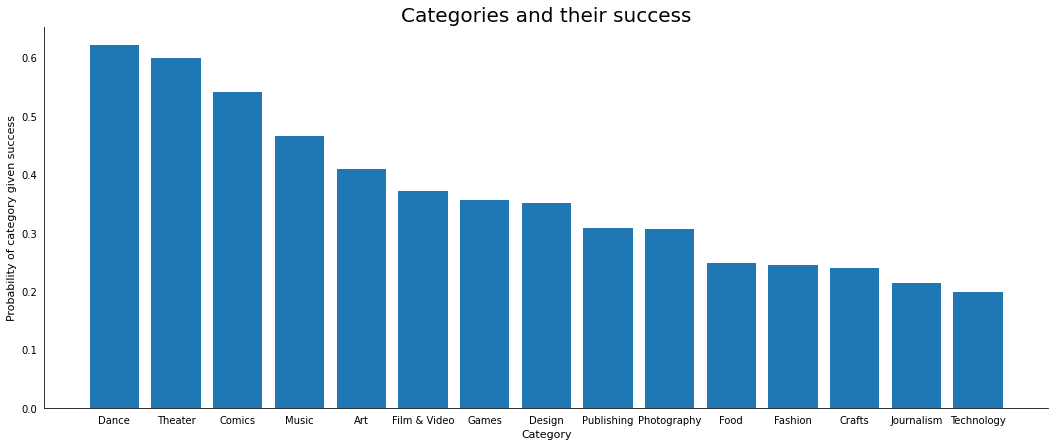

In [166]:
fig, ax = plt.subplots(figsize=(18,7))

ax.bar(df_category.category,df_category['ps_in_category'] )

ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of category given success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)


ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)




This graph shows us the probability per category. However, I want to add one more variable to give a clearer picture of the data.

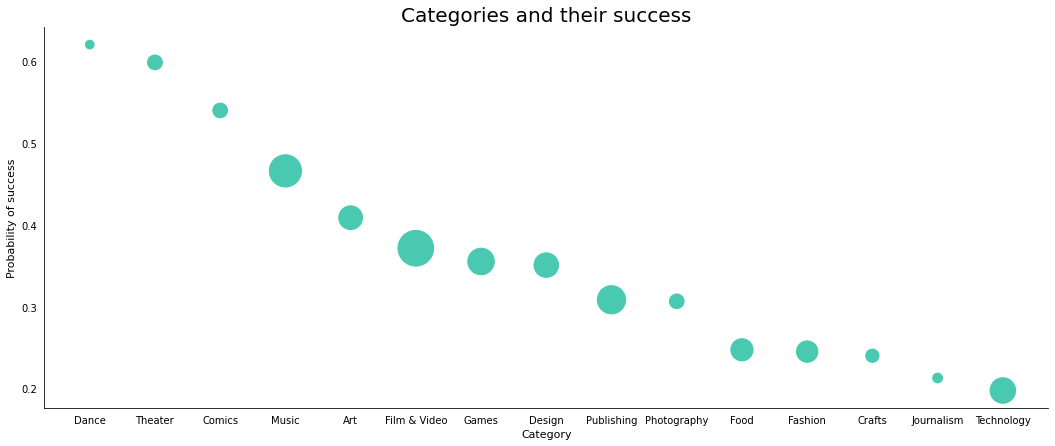

In [167]:
fig, ax = plt.subplots(figsize=(18,7))

ax.scatter(df_category.category,df_category['ps_in_category'], s=df_category['total']/50, c='#48C9B0' )

ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)


ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)




In this graph I added the total amount of projects within the category as the factor of size. Now we see that the category with the highest probability of funding in Dance but this is also a category with fewer total projects. 

But this table may trick the eye a bit due to the short y axis. Lets open up a fuller picture by setting the upper limit at 1. 

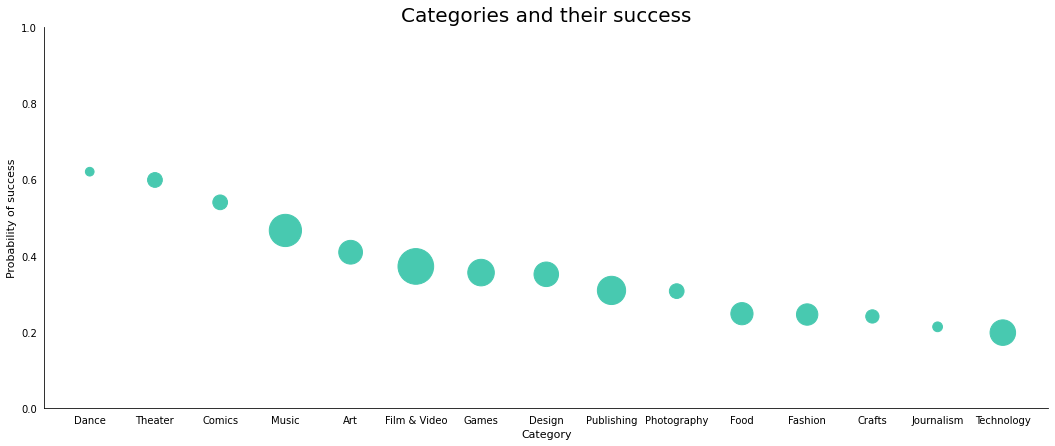

In [168]:
fig, ax = plt.subplots(figsize=(18,7))

ax.scatter(df_category.category,df_category['ps_in_category'], s=df_category['total']/50, c='#48C9B0' )


ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)

ax.set_ylim(0,1)

ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)

So this graph gives us a sense of the likelyhood of funding your project within different categories. So, if I were to put up any Kickstarter project I would choose Dance and Theater. But what type of other business decisions can this data tell us?

In [179]:
df_category=df_category.sort_values('cat_in_success', ascending=False)

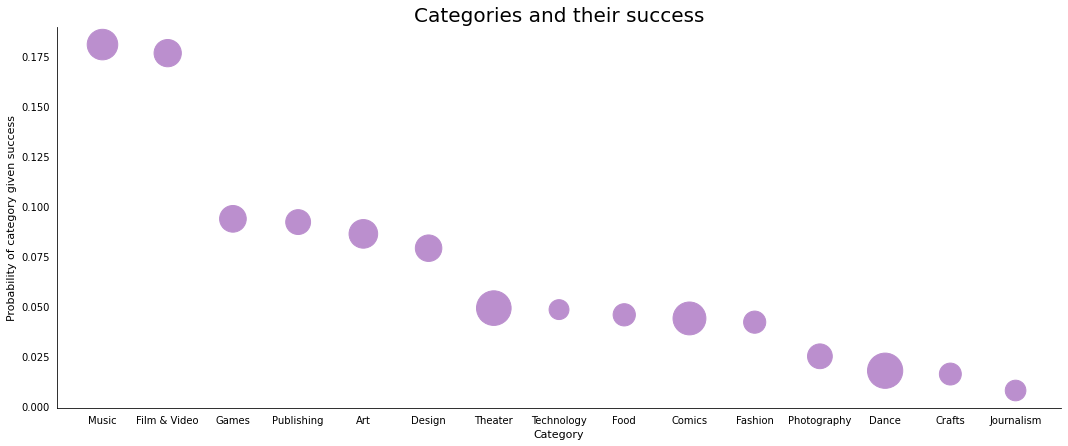

In [180]:
fig, ax = plt.subplots(figsize=(18,7))

ax.scatter(df_category.category,df_category['cat_in_success'], s=df_category['ps_in_category']*2000, c='#BB8FCE' )

ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of category given success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)


ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)

### Probability of finding a specific category within the pool of successes.
This graph plots the probability that a project blongs to a certain category assuming success. Why is this interesting? Well assume you are discussing investing money into one of the Kickstarter categories, hand out a price or host an event for the winners. This graph will give you a sense for what categories will have the biggest reach and therefore more impressions. I would probably go with Music or Film&Video. 

#  3. The sweet spot

"Ok good to know! But, doesnt it also matter how much money they are asking for?"

"What I want to know is what category at what funding goal that is my best bet to invest."

Alright let's calculate that!

In [108]:
df4=kick.copy()

In [109]:
df4=df4[['name', 'main_category', 'goal','pledged','state']]

In [110]:
df4

,name,main_category,goal,pledged,state
0,The Songs of Adelaide & Abullah,Publishing,1000.0,0.0,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,2421.0,failed
2,Where is Hank?,Film & Video,45000.0,220.0,failed
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0,failed
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0,canceled
...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,50000.0,25.0,canceled
378657,The Tribe,Film & Video,1500.0,155.0,failed
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,15000.0,20.0,failed
378659,BioDefense Education Kit,Technology,15000.0,200.0,failed


Lets get a sense of the data.


In [111]:
print('max goal: ' + str(df4.goal.max()))
print('min goal: ' + str(df4.goal.min()))
print('mean goal: '+ str(df4.goal.mean()))
print('median goal: '+ str(df4.goal.median()))
print('standard deviation goal: '+ str(df4.goal.std()))

max goal: 100000000.0
min goal: 0.01
mean goal: 49080.79152056854
median goal: 5200.0
standard deviation goal: 1183391.2590927128


In [112]:
df4.loc[df4['goal']>=1000000.0]

,name,main_category,goal,pledged,state
340,You in a novel,Publishing,1000000.0,10.0,failed
404,MKP - The Smart & Versatile Touch Screen Keybo...,Technology,1700000.0,970.0,canceled
528,Green Lizzie: The only container truly adapted...,Design,1700000.0,40835.0,failed
776,Xybears The Last Heroes,Film & Video,1000000.0,25.0,failed
971,Maori MBT Awareness Centre,Journalism,2000000.0,2242.0,failed
...,...,...,...,...,...
377444,Albert Einstein Museum,Technology,50000000.0,240.0,failed
377579,Your Best Surgeon Around The World,Technology,5000000.0,0.0,failed
377649,Love Revolution 24,Music,39023437.0,5.0,failed
378165,Food for FREE,Food,4500000.0,0.0,failed


With such a large range of numbers we need to make Bins to make it easier to work with.

In [113]:
bins = np.array([1,1000,5000,10000,50000,100000,1000000,10000000])


In [114]:
df4["bucket"] = pd.cut(df4.goal, bins)


In [115]:
df4.head()

,name,main_category,goal,pledged,state,bucket
0,The Songs of Adelaide & Abullah,Publishing,1000.0,0.0,failed,"(1, 1000]"
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,2421.0,failed,"(10000, 50000]"
2,Where is Hank?,Film & Video,45000.0,220.0,failed,"(10000, 50000]"
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0,failed,"(1000, 5000]"
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0,canceled,"(10000, 50000]"


Great! Now with this tables we can group it according to Category and Buckets.

In [116]:
df_goal=df4.groupby(['main_category','bucket']).name.count().reset_index()
df_goal=df_goal.rename(columns={'name':'total cat projects'})
df_goal

,main_category,bucket,total cat projects
0,Art,"(1, 1000]",8477
1,Art,"(1000, 5000]",10910
2,Art,"(5000, 10000]",3893
3,Art,"(10000, 50000]",3809
4,Art,"(50000, 100000]",546
...,...,...,...
100,Theater,"(5000, 10000]",1619
101,Theater,"(10000, 50000]",1431
102,Theater,"(50000, 100000]",225
103,Theater,"(100000, 1000000]",161


Lets see how many projects were successfull in each bucket.

In [117]:
win_goal=df4[df4['state'].isin(['successful'])][['main_category','bucket','name']
].groupby(['main_category','bucket']).count().rename(columns={'name':'success in bucket'}).reset_index()
win_goal

,main_category,bucket,success in bucket
0,Art,"(1, 1000]",4311.0
1,Art,"(1000, 5000]",4778.0
2,Art,"(5000, 10000]",1384.0
3,Art,"(10000, 50000]",917.0
4,Art,"(50000, 100000]",60.0
...,...,...,...
100,Theater,"(5000, 10000]",833.0
101,Theater,"(10000, 50000]",518.0
102,Theater,"(50000, 100000]",51.0
103,Theater,"(100000, 1000000]",13.0


Im making a fail version too to use as a way to check that my numbers make sense. 

In [118]:
fail_goal=df4[~df4['state'].isin(['successful'])][['main_category','bucket','name']
].groupby(['main_category','bucket']).count().rename(columns={'name':'fail in bucket'}).reset_index()
fail_goal

,main_category,bucket,fail in bucket
0,Art,"(1, 1000]",4166
1,Art,"(1000, 5000]",6132
2,Art,"(5000, 10000]",2509
3,Art,"(10000, 50000]",2892
4,Art,"(50000, 100000]",486
...,...,...,...
100,Theater,"(5000, 10000]",786
101,Theater,"(10000, 50000]",913
102,Theater,"(50000, 100000]",174
103,Theater,"(100000, 1000000]",148


Put it all together

In [119]:
df_goal=pd.merge(df_goal, win_goal, how='inner',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [120]:
df_goal=pd.merge(df_goal, fail_goal, how='inner',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [121]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket
0,Art,"(1, 1000]",8477,4311.0,4166
1,Art,"(1000, 5000]",10910,4778.0,6132
2,Art,"(5000, 10000]",3893,1384.0,2509
3,Art,"(10000, 50000]",3809,917.0,2892
4,Art,"(50000, 100000]",546,60.0,486
...,...,...,...,...,...
100,Theater,"(5000, 10000]",1619,833.0,786
101,Theater,"(10000, 50000]",1431,518.0,913
102,Theater,"(50000, 100000]",225,51.0,174
103,Theater,"(100000, 1000000]",161,13.0,148


Now, in order to make the probability calculations later on I choose to merge some columns from the previous table.

In [122]:
df_goal2=pd.merge(df_goal, df_category[['category','ps_in_category', 'pf_in_category']], how='inner', left_on='main_category', right_on='category',sort=True,
         suffixes=('_bucket', '_category'), copy=True, indicator=False,
         validate=None)

In [123]:
df_goal2.drop(columns='category', inplace=True)

In [124]:
df_goal=df_goal2.copy()

In [125]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket,ps_in_category,pf_in_category
0,Art,"(1, 1000]",8477,4311.0,4166,0.408837,0.591163
1,Art,"(1000, 5000]",10910,4778.0,6132,0.408837,0.591163
2,Art,"(5000, 10000]",3893,1384.0,2509,0.408837,0.591163
3,Art,"(10000, 50000]",3809,917.0,2892,0.408837,0.591163
4,Art,"(50000, 100000]",546,60.0,486,0.408837,0.591163
...,...,...,...,...,...,...,...
100,Theater,"(5000, 10000]",1619,833.0,786,0.598735,0.401265
101,Theater,"(10000, 50000]",1431,518.0,913,0.598735,0.401265
102,Theater,"(50000, 100000]",225,51.0,174,0.598735,0.401265
103,Theater,"(100000, 1000000]",161,13.0,148,0.598735,0.401265


Let the cacultations begin:

In [126]:
df_goal['prob_bucket']=df_goal['total cat projects']/total

In [127]:
df_goal['prob_bucket_in_success']=df_goal['success in bucket']/df_goal['success in bucket'].sum()

In [128]:
df_goal['prob_success_in_bucket']=(df_goal['prob_bucket_in_success']*total_prob_success)/df_goal['prob_bucket']

In [129]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket,ps_in_category,pf_in_category,prob_bucket,prob_bucket_in_success,prob_success_in_bucket
0,Art,"(1, 1000]",8477,4311.0,4166,0.408837,0.591163,0.022387,0.032258,0.509755
1,Art,"(1000, 5000]",10910,4778.0,6132,0.408837,0.591163,0.028812,0.035753,0.438982
2,Art,"(5000, 10000]",3893,1384.0,2509,0.408837,0.591163,0.010281,0.010356,0.356351
3,Art,"(10000, 50000]",3809,917.0,2892,0.408837,0.591163,0.010059,0.006862,0.241315
4,Art,"(50000, 100000]",546,60.0,486,0.408837,0.591163,0.001442,0.000449,0.110150
...,...,...,...,...,...,...,...,...,...,...
100,Theater,"(5000, 10000]",1619,833.0,786,0.598735,0.401265,0.004276,0.006233,0.515732
101,Theater,"(10000, 50000]",1431,518.0,913,0.598735,0.401265,0.003779,0.003876,0.362841
102,Theater,"(50000, 100000]",225,51.0,174,0.598735,0.401265,0.000594,0.000382,0.227203
103,Theater,"(100000, 1000000]",161,13.0,148,0.598735,0.401265,0.000425,0.000097,0.080936


And the same for the opposite event to have for checking the outcome later:

In [130]:
df_goal['prob_bucket_in_fail']=df_goal['fail in bucket']/df_goal['fail in bucket'].sum()

In [131]:
df_goal['prob_fail_in_bucket']=(df_goal['prob_bucket_in_fail']*(1-total_prob_success))/df_goal['prob_bucket']

In [132]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket,ps_in_category,pf_in_category,prob_bucket,prob_bucket_in_success,prob_success_in_bucket,prob_bucket_in_fail,prob_fail_in_bucket
0,Art,"(1, 1000]",8477,4311.0,4166,0.408837,0.591163,0.022387,0.032258,0.509755,0.017044,0.492002
1,Art,"(1000, 5000]",10910,4778.0,6132,0.408837,0.591163,0.028812,0.035753,0.438982,0.025087,0.562688
2,Art,"(5000, 10000]",3893,1384.0,2509,0.408837,0.591163,0.010281,0.010356,0.356351,0.010265,0.645218
3,Art,"(10000, 50000]",3809,917.0,2892,0.408837,0.591163,0.010059,0.006862,0.241315,0.011832,0.760112
4,Art,"(50000, 100000]",546,60.0,486,0.408837,0.591163,0.001442,0.000449,0.110150,0.001988,0.891115
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Theater,"(5000, 10000]",1619,833.0,786,0.598735,0.401265,0.004276,0.006233,0.515732,0.003216,0.486033
101,Theater,"(10000, 50000]",1431,518.0,913,0.598735,0.401265,0.003779,0.003876,0.362841,0.003735,0.638736
102,Theater,"(50000, 100000]",225,51.0,174,0.598735,0.401265,0.000594,0.000382,0.227203,0.000712,0.774207
103,Theater,"(100000, 1000000]",161,13.0,148,0.598735,0.401265,0.000425,0.000097,0.080936,0.000605,0.920293


So, now lets take out the parts I am intersted.

In [133]:
tablewin = df_goal[['main_category','bucket','prob_success_in_bucket']]

In [136]:
tablewin_pivot = pd.pivot_table(tablewin , index=tablewin['main_category'], columns=tablewin['bucket'])

In [137]:
tablewin_pivot

prob_success_in_bucket                             \
bucket                     (1, 1000] (1000, 5000] (5000, 10000]   
main_category                                                     
Art                         0.509755     0.438982      0.356351   
Comics                      0.709385     0.549089      0.457908   
Crafts                      0.367554     0.197621      0.157268   
Dance                       0.652160     0.685077      0.590163   
Design                      0.540601     0.424151      0.362938   
Fashion                     0.331154     0.234011      0.245793   
Film & Video                0.506199     0.444274      0.387430   
Food                        0.320858     0.306142      0.297447   
Games                       0.527172     0.430584      0.350189   
Journalism                  0.298664     0.240643      0.165378   
Music                       0.531496     0.495859      0.465020   
Photography                 0.411215     0.294074      0.266020   
Publishing                  0.459047     0.332937      0.268008   
Technology                  0.381592     0.253509      0.199333   
Theater                     0.723282     0.673888      0.515732   

                                                                \
bucket        (10000, 50000] (50000, 100000] (100000, 1000000]   
main_category                                                    
Art                 0.241315        0.110150          0.046451   
Comics              0.410304        0.243221          0.138789   
Crafts              0.117665        0.044882          0.030071   
Dance               0.431606        0.044550          0.103693   
Design              0.307694        0.181958          0.136686   
Fashion             0.232385        0.077334          0.077703   
Film & Video        0.301468        0.165952          0.068032   
Food                0.223498        0.064839          0.022662   
Games               0.278274        0.169575          0.116932   
Journalism          0.172586        0.072988          0.099471   
Music               0.366318        0.135709          0.054834   
Photography         0.281552        0.127468          0.050118   
Publishing          0.205175        0.089358          0.079592   
Technology          0.188924        0.149622          0.066018   
Theater             0.362841        0.227203          0.080936   

                                   
bucket        (1000000, 10000000]  
main_category                      
Art                           NaN  
Comics                        NaN  
Crafts                        NaN  
Dance                         NaN  
Design                   0.029481  
Fashion                  0.062648  
Film & Video             0.014654  
Food                          NaN  
Games                    0.055687  
Journalism                    NaN  
Music                         NaN  
Photography                   NaN  
Publishing                    NaN  
Technology               0.003885  
Theater                       NaN

There it is: What would you invest in?


And the same for the opposite, just to check.

In [138]:
tablefail = df_goal[['main_category','bucket','prob_fail_in_bucket']]

In [139]:
tablefail_pivot = pd.pivot_table(tablefail , index=tablefail ['main_category'], columns=tablefail['bucket'])

In [140]:
tablefail_pivot

prob_fail_in_bucket                                            \
bucket                  (1, 1000] (1000, 5000] (5000, 10000] (10000, 50000]   
main_category                                                                 
Art                      0.492002     0.562688      0.645218       0.760112   
Comics                   0.292619     0.452717      0.543786       0.591331   
Crafts                   0.634028     0.803751      0.844055       0.883609   
Dance                    0.349773     0.316897      0.411693       0.570055   
Design                   0.461194     0.577501      0.638639       0.693814   
Fashion                  0.670384     0.767406      0.755639       0.769030   
Film & Video             0.495554     0.557402      0.614176       0.700032   
Food                     0.680667     0.695365      0.704049       0.777907   
Games                    0.474607     0.571076      0.651372       0.723198   
Journalism               0.702834     0.760782      0.835955       0.828756   
Music                    0.470289     0.505881      0.536683       0.635263   
Photography              0.590421     0.707418      0.735437       0.719924   
Publishing               0.542647     0.668603      0.733452       0.796207   
Technology               0.620008     0.747933      0.802042       0.812438   
Theater                  0.278739     0.328072      0.486033       0.638736   

                                                                     
bucket        (50000, 100000] (100000, 1000000] (1000000, 10000000]  
main_category                                                        
Art                  0.891115          0.954735            1.001129  
Comics               0.758208          0.862511            1.001129  
Crafts               0.956302          0.971095            1.001129  
Dance                0.956635          0.897564            1.001129  
Design               0.819396          0.864612            0.971684  
Fashion              0.923891          0.923522            0.938559  
Film & Video         0.835381          0.933181            0.986493  
Food                 0.936370          0.978495            1.001129  
Games                0.831763          0.884341            0.945511  
Journalism           0.928231          0.901780            1.001129  
Music                0.865588          0.946363            1.001129  
Photography          0.873818          0.951073            1.001129  
Publishing           0.911881          0.921635            1.001129  
Technology           0.851692          0.935192            0.997249  
Theater              0.774207          0.920293            1.001129

There it is! This is my first full individual project. I realize many steps could be simplified, if you know them, please reach out. It is time to learn by doing!

Thanks for reading!